1. Analisis Data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8416 non-null   object
 1   cap-surface               8416 non-null   object
 2   cap-color                 8416 non-null   object
 3   bruises                   8416 non-null   object
 4   odor                      8416 non-null   object
 5   gill-attachment           8416 non-null   object
 6   gill-spacing              8416 non-null   object
 7   gill-size                 8416 non-null   object
 8   gill-color                8416 non-null   object
 9   stalk-shape               8416 non-null   object
 10  stalk-root                5936 non-null   object
 11  stalk-surface-above-ring  8416 non-null   object
 12  stalk-surface-below-ring  8416 non-null   object
 13  stalk-color-above-ring    8416 non-null   object
 14  stalk-color-below-ring  

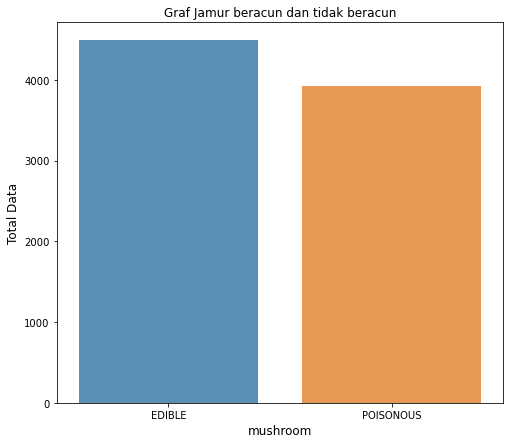

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import scipy.stats as ss
import warnings

warnings.filterwarnings("ignore")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

dc = "mushroom_dataset_new.csv"

data = pd.read_csv(dc, na_values="?")

display(data.head()) #Menampilkan 5 data dari atas

data.info() #Untuk menampilkan info data seperti Dtype dan jumlah data yang null.

data.fillna("N/A", inplace = True)

data.describe() #Untuk menampilkan data yang sering muncul dari tiap kolom

print("Dataset shape:", data.shape) #Untuk menampilkan bentuk data, total data dan jumlah kolom

# for column in data.columns.tolist():
#     print(data[column].value_counts())

data["mushroom"].unique()

count = data['mushroom'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="tab10")
plt.ylabel('Total Data', fontsize=12)
plt.xlabel('mushroom', fontsize=12)
plt.title('Graf Jamur beracun dan tidak beracun')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

In [3]:
data = data.astype('category') #mengubah tipe data object menjadi category
data.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
mushroom                    category
dtype: object

In [4]:
i = 1
for column in data.columns:
    occur = data.groupby([column]).size()
    display(occur)
    print(i)
    i+=1
#Untuk menampilkan data yang muncul pada tiap kolom. Sangat berguna apabila ingin mencari tahu record-record sebelum di encoding

cap-shape
BELL        452
CONICAL       4
CONVEX     3796
FLAT       3292
KNOBBED     840
SUNKEN       32
dtype: int64

1


cap-surface
FIBROUS    2460
GROOVES       4
SCALY      3268
SMOOTH     2684
dtype: int64

2


cap-color
BROWN       2320
BUFF         168
CINNAMON      44
GRAY        2096
GREEN         16
PINK         144
PURPLE        16
RED         1500
WHITE       1040
YELLOW      1072
dtype: int64

3


bruises
BRUISES    3376
NO         5040
dtype: int64

4


odor
ALMOND       400
ANISE        400
CREOSOTE     192
FISHY        576
FOUL        2160
MUSTY         48
NONE        3808
PUNGENT      256
SPICY        576
dtype: int64

5


gill-attachment
ATTACHED     216
FREE        8200
dtype: int64

6


gill-spacing
CLOSE      6824
CROWDED    1592
dtype: int64

7


gill-size
BROAD     5880
NARROW    2536
dtype: int64

8


gill-color
BLACK         472
BROWN        1112
BUFF         1728
CHOCOLATE     796
GRAY          752
GREEN          24
ORANGE         64
PINK         1556
PURPLE        492
RED            96
WHITE        1232
YELLOW         92
dtype: int64

9


stalk-shape
ENLARGING    3552
TAPERING     4864
dtype: int64

10


stalk-root
BULBOUS    3800
CLUB        568
EQUAL      1376
N/A        2480
ROOTED      192
dtype: int64

11


stalk-surface-above-ring
FIBROUS     692
SCALY        24
SILKY      2384
SMOOTH     5316
dtype: int64

12


stalk-surface-below-ring
FIBROUS     740
SCALY       296
SILKY      2304
SMOOTH     5076
dtype: int64

13


stalk-color-above-ring
BROWN        448
BUFF         432
CINNAMON      48
GRAY         576
ORANGE       192
PINK        1872
RED           96
WHITE       4744
YELLOW         8
dtype: int64

14


stalk-color-below-ring
BROWN        536
BUFF         432
CINNAMON      48
GRAY         576
ORANGE       192
PINK        1872
RED           96
WHITE       4640
YELLOW        24
dtype: int64

15


veil-color
BROWN       96
ORANGE      96
WHITE     8216
YELLOW       8
dtype: int64

16


ring-number
NONE      48
ONE     7768
TWO      600
dtype: int64

17


ring-type
EVANESCENT    3056
FLARING         48
LARGE         1296
NONE            48
PENDANT       3968
dtype: int64

18


spore-print-color
BLACK        2000
BROWN        2096
BUFF           48
CHOCOLATE    1632
GREEN          72
ORANGE         48
PURPLE         48
WHITE        2424
YELLOW         48
dtype: int64

19


population
ABUNDANT      512
CLUSTERED     352
NUMEROUS      400
SCATTERED    1376
SEVERAL      4064
SOLITARY     1712
dtype: int64

20


habitat
GRASSES    2404
LEAVES      856
MEADOWS     292
PATHS      1144
URBAN       368
WASTE       192
WOODS      3160
dtype: int64

21


mushroom
EDIBLE       4488
POISONOUS    3928
dtype: int64

22


In [5]:
#Label enconding dengan cara Bryan
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [6]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,2,3,8,0,0,1,1,1,10,1,...,3,7,7,2,1,4,6,4,6,0
1,2,3,8,0,0,1,1,1,10,1,...,3,7,7,2,1,4,1,4,6,0
2,2,3,8,0,0,1,1,1,7,1,...,3,7,7,2,1,4,6,4,6,0
3,2,3,8,0,0,1,1,1,7,1,...,3,7,7,2,1,4,1,4,6,0
4,2,3,8,0,0,1,1,1,1,1,...,3,7,7,2,1,4,6,4,6,0


[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-color'),
 Text(16, 0, 'ring-number'),
 Text(17, 0, 'ring-type'),
 Text(18, 0, 'spore-print-color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitat')]

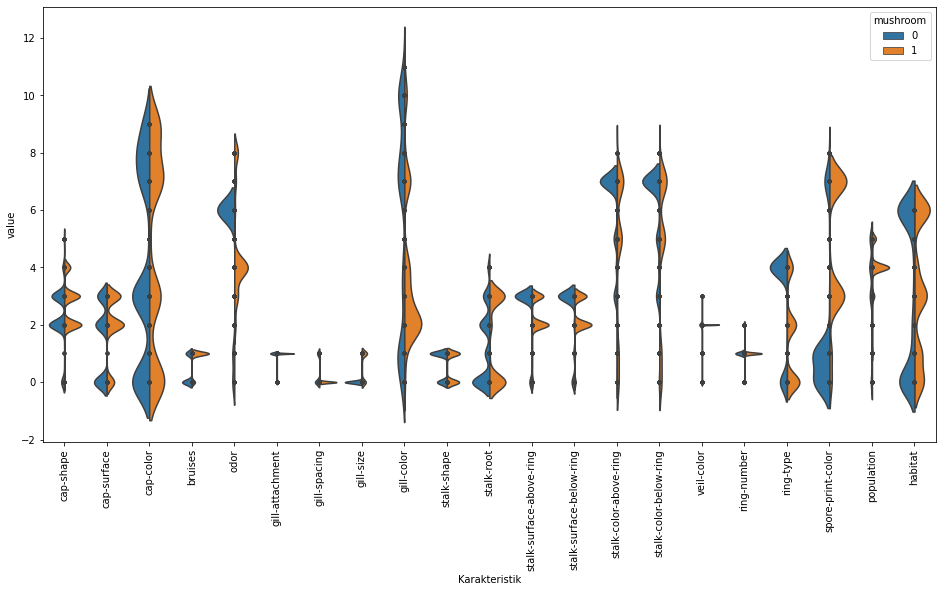

In [7]:
data_div = pd.melt(data, "mushroom", var_name="Karakteristik")
fig, ax = plt.subplots(figsize=(16,8))
p = sns.violinplot(ax = ax, x="Karakteristik", y="value", hue="mushroom", split = True, data=data_div, inner = 'point', palette = 'tab10')
data_no_mushroom = data.drop(["mushroom"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_mushroom.columns))
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

In [8]:
i = 1
for column in data.columns:
    occur = data.groupby([column]).size()
    display(occur)
    print(i)
    i+=1

cap-shape
0     452
1       4
2    3796
3    3292
4     840
5      32
dtype: int64

1


cap-surface
0    2460
1       4
2    3268
3    2684
dtype: int64

2


cap-color
0    2320
1     168
2      44
3    2096
4      16
5     144
6      16
7    1500
8    1040
9    1072
dtype: int64

3


bruises
0    3376
1    5040
dtype: int64

4


odor
0     400
1     400
2     192
3     576
4    2160
5      48
6    3808
7     256
8     576
dtype: int64

5


gill-attachment
0     216
1    8200
dtype: int64

6


gill-spacing
0    6824
1    1592
dtype: int64

7


gill-size
0    5880
1    2536
dtype: int64

8


gill-color
0      472
1     1112
2     1728
3      796
4      752
5       24
6       64
7     1556
8      492
9       96
10    1232
11      92
dtype: int64

9


stalk-shape
0    3552
1    4864
dtype: int64

10


stalk-root
0    3800
1     568
2    1376
3    2480
4     192
dtype: int64

11


stalk-surface-above-ring
0     692
1      24
2    2384
3    5316
dtype: int64

12


stalk-surface-below-ring
0     740
1     296
2    2304
3    5076
dtype: int64

13


stalk-color-above-ring
0     448
1     432
2      48
3     576
4     192
5    1872
6      96
7    4744
8       8
dtype: int64

14


stalk-color-below-ring
0     536
1     432
2      48
3     576
4     192
5    1872
6      96
7    4640
8      24
dtype: int64

15


veil-color
0      96
1      96
2    8216
3       8
dtype: int64

16


ring-number
0      48
1    7768
2     600
dtype: int64

17


ring-type
0    3056
1      48
2    1296
3      48
4    3968
dtype: int64

18


spore-print-color
0    2000
1    2096
2      48
3    1632
4      72
5      48
6      48
7    2424
8      48
dtype: int64

19


population
0     512
1     352
2     400
3    1376
4    4064
5    1712
dtype: int64

20


habitat
0    2404
1     856
2     292
3    1144
4     368
5     192
6    3160
dtype: int64

21


mushroom
0    4488
1    3928
dtype: int64

22


In [9]:
# plt.figure(figsize=(15,10))
# for i, col in enumerate(data.columns):
#     sns.set_palette(sns.color_palette("Paired"))
#     ax = plt.subplot(6,4,i+1)
#     sns.countplot(
#         x=col, data = data, ax = ax, 
#         order = data[col].value_counts(ascending=True).index
#     )
#     sns.set_style('whitegrid')
#     plt.xticks(rotation=90)
#     plt.ylabel("Median Price")
#     plt.tight_layout()
# plt.show()

In [10]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = list(data.columns)
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

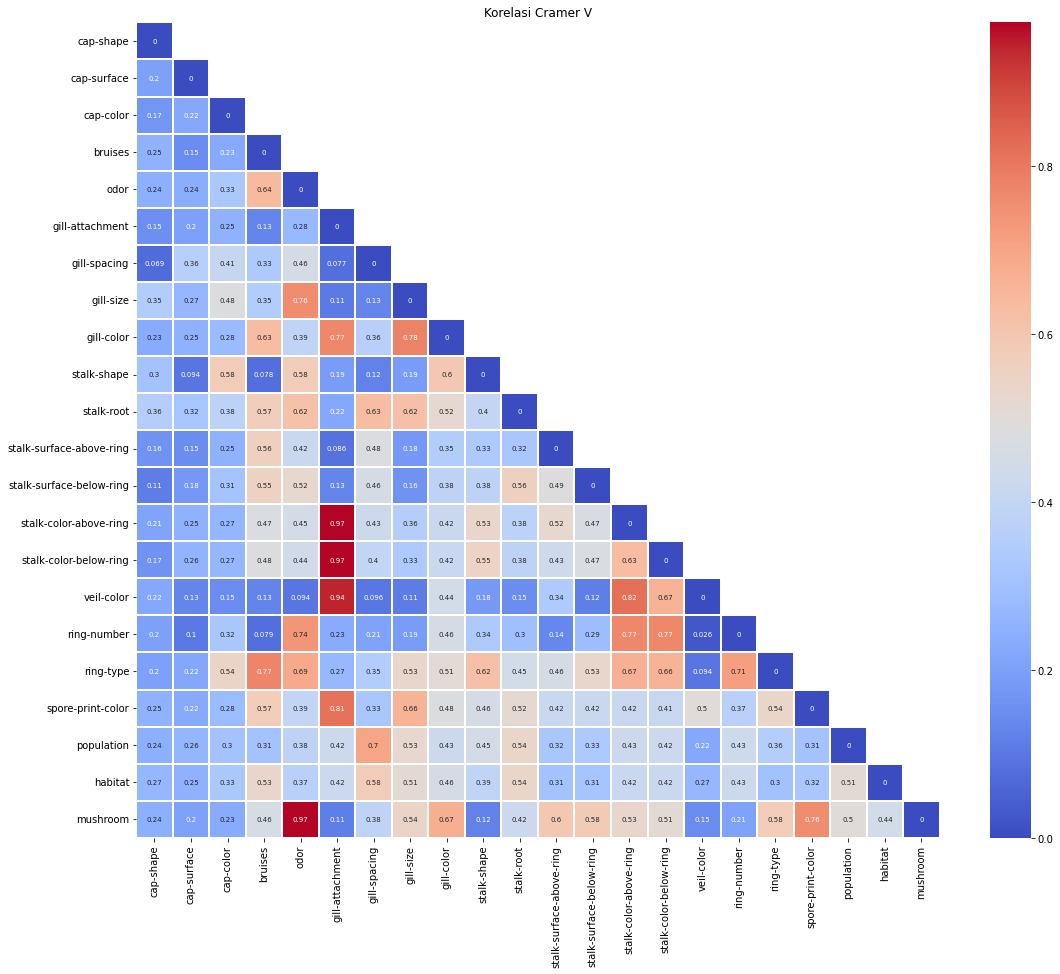

In [11]:
mask = np.triu(data.corr()-1)

# plt.figure(figsize=(18,15))
# sns.heatmap(data.corr(),linewidths=.1,cmap="coolwarm", annot=True, annot_kws={"size": 7}, mask= mask)
# plt.yticks(rotation=0);
# #plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')
# Metode Pearson diatas

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(corr,linewidths=.1,cmap="coolwarm", annot=True, ax=ax, annot_kws={"size": 7}, mask= mask);
ax.set_title("Korelasi Cramer V");